# Linear Regression

### Understanding and exploring the dataset

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# Mount Google drive
# from google.colab import drive
# drive.mount('/content/drive')
# # save filepath to variable for easier access
# # housing_data_file_path = '/content/drive/My Drive/housing.csv'
housing_data_file_path = 'https://raw.githubusercontent.com/bharath-nepoleon/sklearn-session/master/housing.csv'
# read the data and store data in DataFrame titled melbourne_data
housing_data = pd.read_csv(housing_data_file_path) 
# print a summary of the data in Melbourne data
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [56]:
# Get first ten rows of the data
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [57]:
# The variable we want to predict is median_house_value
# More information on the predictors in the data set
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


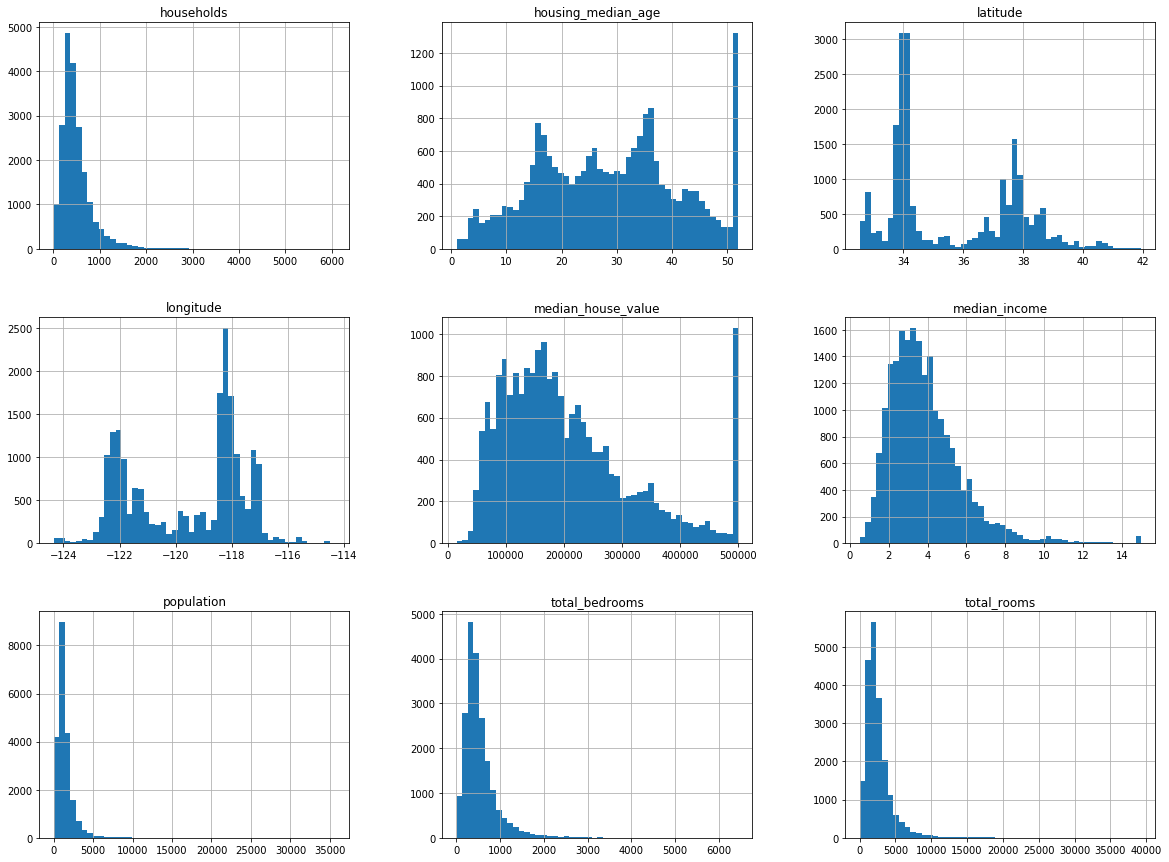

In [58]:
#Understanding how each of the columns values are distributed
housing_data.hist(bins=50,figsize=(20,15))#The bins parameter is used to custom the number of bins shown on the plots.
plt.show()

In [59]:
housing_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Data Cleaning

> > > Most Machine Learning algorithms cannot work with **missing features**, so let’s create a few functions to take care of them. You noticed earlier that the total_bedrooms attribute has some missing values, so let’s fix this. You have three options:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.)

Lets take the simplest option 1 and remove all the rows/district's data which has missing total_bedrooms attribute.

In [60]:
housing_data_clean1 = housing_data.dropna()
housing_data_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [61]:
#Understand ocean_proximity attribute
housing_data_clean1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [62]:
housing_data_clean1.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [63]:
#Remove ocean_proximity attribute until we learn how to use categorical data in linear regression
housing_data_clean = housing_data_clean1.drop(['ocean_proximity'], axis=1)

In [64]:
housing_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
dtypes: float64(9)
memory usage: 1.6 MB


In [65]:
x=housing_data_clean.drop('median_house_value',axis=1).values
y=housing_data_clean['median_house_value'].values

In [66]:
x.shape

(20433, 8)

In [67]:
y.shape

(20433,)

In [68]:
#Training and Testing sampling
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [69]:
xtrain.shape

(14303, 8)

In [70]:
ytrain.shape

(14303,)

In [71]:
xtest.shape

(6130, 8)

In [72]:
ytest.shape

(6130,)

In [73]:
print('Linear regression with all features')
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

Linear regression with all features


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Evaluating the model's performance

In [74]:
from sklearn.metrics import mean_squared_error
import numpy as np
lr_rmse=np.sqrt(mean_squared_error(ytrain,model.predict(xtrain)))

In [75]:
lr_rmse

69632.3495948106

root mean squared error for test data   is 69446.56831201504


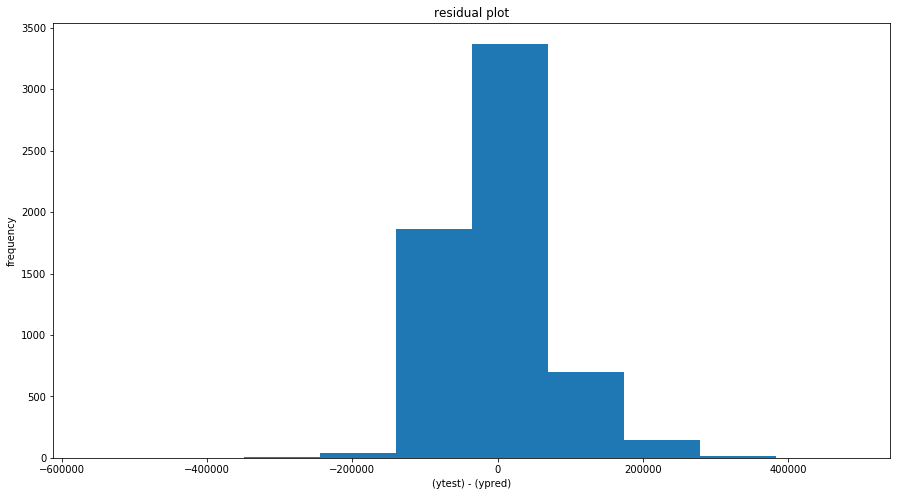

In [76]:
ypred = model.predict(xtest)
plt.figure(figsize=(15,8))
plt.xlabel('(ytest) - (ypred)')
plt.ylabel('frequency')
plt.title('residual plot')
plt.hist(ytest-ypred)
print("root mean squared error for test data   is "+str(np.sqrt(mean_squared_error(ytest,ypred))))
plt.show()

In [77]:
print(f'r_sqr value: {model.score(xtest, ytest)}')

r_sqr value: 0.6403743192517617


In [78]:
import statsmodels.api as sm

model1=sm.OLS(ytrain,xtrain)

result=model1.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 1.593e+04
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        05:35:02   Log-Likelihood:            -1.8086e+05
No. Observations:               14303   AIC:                         3.617e+05
Df Residuals:                   14295   BIC:                         3.618e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2209.5662    130.050    -16.990      0.0

## More Data Preprocessing

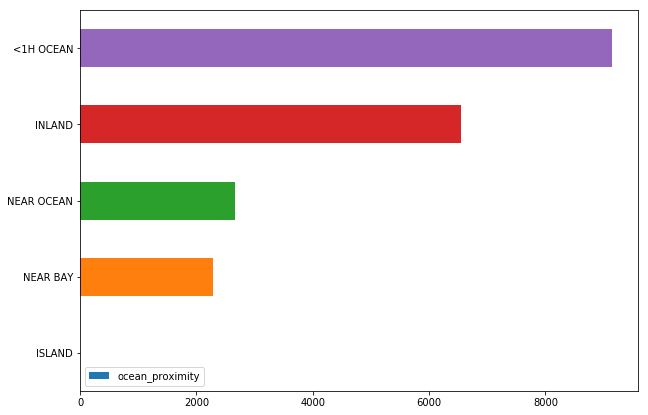

In [79]:
## Handling Categorical Data(ocean_proximity)
## Look at the distribution of ocean_proximity

housing_data.ocean_proximity.value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,7))
plt.legend()

In [80]:
## Encode the cattegorical variable
from sklearn.preprocessing import OneHotEncoder
lab_encoder = OneHotEncoder()
print(housing_data_clean1[['ocean_proximity']].shape)
cat_enc = lab_encoder.fit_transform(housing_data_clean1[['ocean_proximity']])
print(cat_enc.toarray())
print(lab_encoder.categories_)
print(lab_encoder.get_feature_names())

(20433, 1)
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
['x0_<1H OCEAN' 'x0_INLAND' 'x0_ISLAND' 'x0_NEAR BAY' 'x0_NEAR OCEAN']


In [81]:
housing_data_clean1['x0_<1H OCEAN'] = cat_enc.toarray()[:, 0]
housing_data_clean1['x0_INLAND'] = cat_enc.toarray()[:, 1]
housing_data_clean1['x0_ISLAND'] = cat_enc.toarray()[:, 2]
housing_data_clean1['x0_NEAR BAY'] = cat_enc.toarray()[:, 3]
housing_data_clean1['x0_NEAR OCEAN'] = cat_enc.toarray()[:, 4]
housing_data_clean1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0


In [82]:
## Now remove ocean_proximity column
housing_data_clean = housing_data_clean1.drop('ocean_proximity',axis=1)
housing_data_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0.0,0.0,0.0,1.0,0.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0.0,0.0,0.0,1.0,0.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0.0,0.0,0.0,1.0,0.0


In [83]:
x=housing_data_clean.drop(columns=['median_house_value']).values
y=housing_data_clean['median_house_value'].values
print(x)

[[-122.23   37.88   41.   ...    0.      1.      0.  ]
 [-122.22   37.86   21.   ...    0.      1.      0.  ]
 [-122.24   37.85   52.   ...    0.      1.      0.  ]
 ...
 [-121.22   39.43   17.   ...    0.      0.      0.  ]
 [-121.32   39.43   18.   ...    0.      0.      0.  ]
 [-121.24   39.37   16.   ...    0.      0.      0.  ]]


root mean squared error for test data   is 68551.8723828915


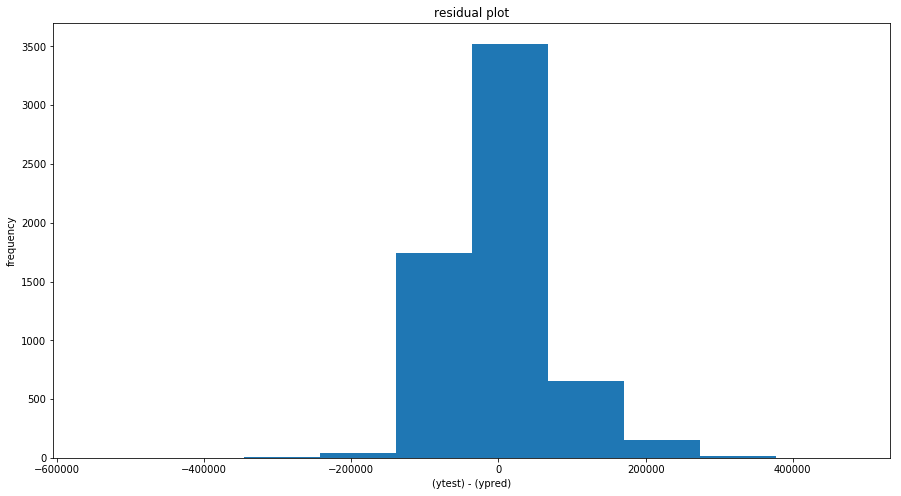

array([-2.73353584e+04, -2.58192312e+04,  1.08754852e+03, -5.20643105e+00,
        9.75258201e+01, -3.54141402e+01,  4.13214431e+01,  3.88732269e+04,
       -3.93045681e+04, -7.84882965e+04,  1.97125135e+05, -4.37520668e+04,
       -3.55802034e+04])

In [84]:
## Do linear regression again
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
plt.figure(figsize=(15,8))
plt.xlabel('(ytest) - (ypred)')
plt.ylabel('frequency')
plt.title('residual plot')
plt.hist(ytest-ypred)
print("root mean squared error for test data   is "+str(np.sqrt(mean_squared_error(ytest,ypred))))
plt.show()
model.coef_

# Removing Highly Correlated Features

In [85]:
x=housing_data_clean.drop(columns=['median_house_value','x0_NEAR OCEAN']).values
y=housing_data_clean['median_house_value'].values
print(x)

[[-122.23   37.88   41.   ...    0.      0.      1.  ]
 [-122.22   37.86   21.   ...    0.      0.      1.  ]
 [-122.24   37.85   52.   ...    0.      0.      1.  ]
 ...
 [-121.22   39.43   17.   ...    1.      0.      0.  ]
 [-121.32   39.43   18.   ...    1.      0.      0.  ]
 [-121.24   39.37   16.   ...    1.      0.      0.  ]]


In [86]:
def plot(ytest,ypred):
    plt.figure(figsize=(15,8))
    plt.xlabel('(ytest) - (ypred)')
    plt.ylabel('frequency')
    plt.title('residual plot')
    plt.hist(ytest-ypred)
    print(f"root mean squared error for test data is {np.sqrt(mean_squared_error(ytest,ypred)):.2f}")
    plt.show()

In [87]:
import statsmodels.api as sm
model2=sm.OLS(y,x)
result=model2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 1.794e+04
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        05:35:03   Log-Likelihood:            -2.5687e+05
No. Observations:               20433   AIC:                         5.138e+05
Df Residuals:                   20421   BIC:                         5.139e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -841.8190    118.703     -7.092      0.0

root mean squared error for test data is 68551.87


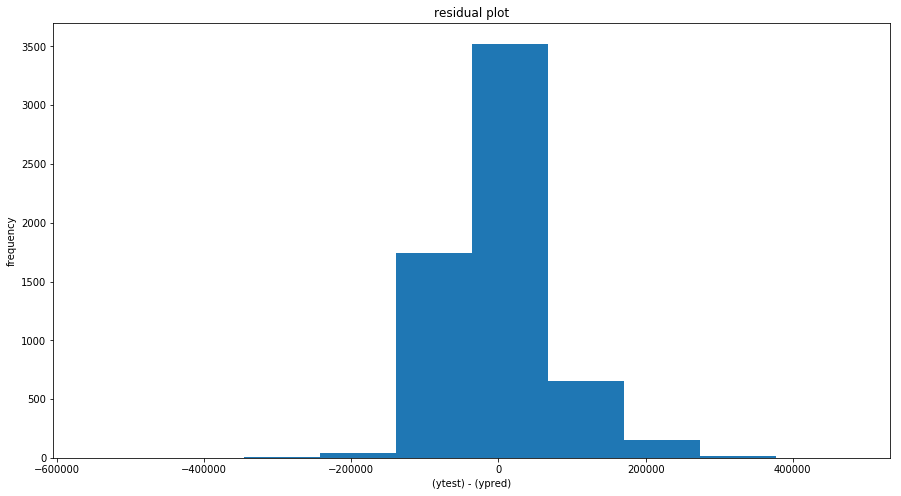

In [88]:
# Do linear regression again
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
plot(ytest,ypred)

In [89]:
corr = np.corrcoef(x, rowvar=False)

In [90]:
import seaborn as sns

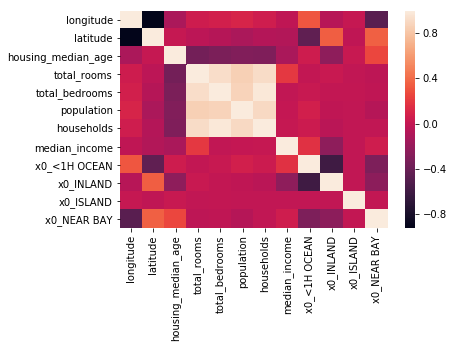

In [91]:
sns.heatmap(housing_data_clean.drop(columns=['median_house_value','x0_NEAR OCEAN']).corr())

In [92]:
# selecting features with low inter-corrleation
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr[i,j]) >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = housing_data_clean.drop(columns=['median_house_value','x0_NEAR OCEAN']).columns[columns]
selected_columns

Index(['longitude', 'housing_median_age', 'total_rooms', 'population',
       'median_income', 'x0_<1H OCEAN', 'x0_INLAND', 'x0_ISLAND',
       'x0_NEAR BAY'],
      dtype='object')

In [93]:
housing_data_clean.drop('median_house_value',axis=1).columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'x0_<1H OCEAN', 'x0_INLAND', 'x0_ISLAND', 'x0_NEAR BAY',
       'x0_NEAR OCEAN'],
      dtype='object')

In [94]:
x=housing_data_clean.drop(columns=['median_house_value','x0_NEAR OCEAN']).values[:,columns]
y=housing_data_clean['median_house_value'].values
print(x)

[[-1.2223e+02  4.1000e+01  8.8000e+02 ...  0.0000e+00  0.0000e+00
   1.0000e+00]
 [-1.2222e+02  2.1000e+01  7.0990e+03 ...  0.0000e+00  0.0000e+00
   1.0000e+00]
 [-1.2224e+02  5.2000e+01  1.4670e+03 ...  0.0000e+00  0.0000e+00
   1.0000e+00]
 ...
 [-1.2122e+02  1.7000e+01  2.2540e+03 ...  1.0000e+00  0.0000e+00
   0.0000e+00]
 [-1.2132e+02  1.8000e+01  1.8600e+03 ...  1.0000e+00  0.0000e+00
   0.0000e+00]
 [-1.2124e+02  1.6000e+01  2.7850e+03 ...  1.0000e+00  0.0000e+00
   0.0000e+00]]


In [95]:
import statsmodels.api as sm
model3=sm.OLS(y,x)
result=model3.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.236e+04
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        05:35:03   Log-Likelihood:            -2.5750e+05
No. Observations:               20433   AIC:                         5.150e+05
Df Residuals:                   20424   BIC:                         5.151e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -597.1226     21.410    -27.890      0.0

In [96]:
x=housing_data_clean.drop(columns=['median_house_value','x0_NEAR OCEAN']).values
y=housing_data_clean['median_house_value'].values
print(x)

[[-122.23   37.88   41.   ...    0.      0.      1.  ]
 [-122.22   37.86   21.   ...    0.      0.      1.  ]
 [-122.24   37.85   52.   ...    0.      0.      1.  ]
 ...
 [-121.22   39.43   17.   ...    1.      0.      0.  ]
 [-121.32   39.43   18.   ...    1.      0.      0.  ]
 [-121.24   39.37   16.   ...    1.      0.      0.  ]]


root mean squared error for test data is 68551.87


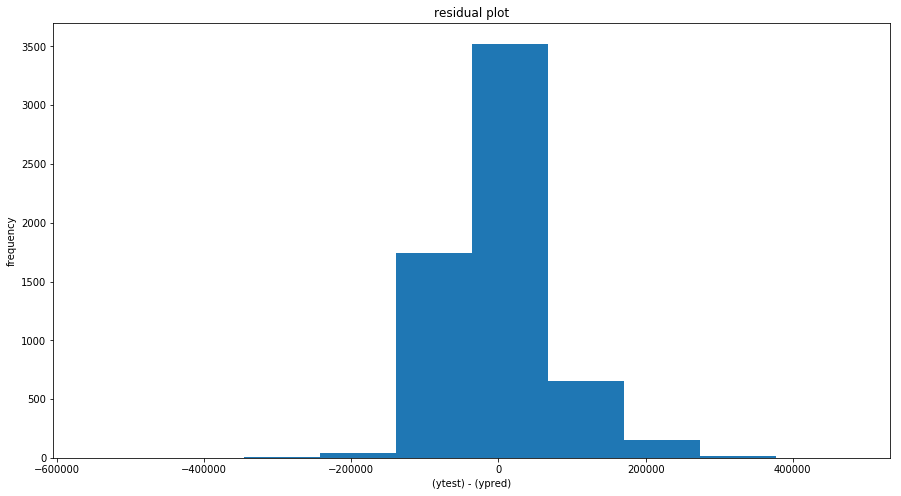

In [97]:
## Do linear regression again
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
plot(ytest,ypred)


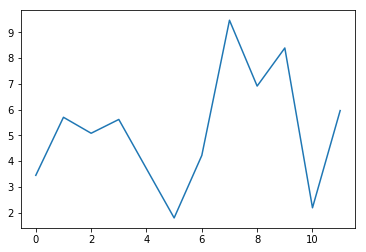

In [98]:
from sklearn.feature_selection import SelectKBest,f_regression
kbest = SelectKBest(f_regression, k='all')
kbest.fit_transform(xtrain,ytrain)
plt.plot(range(xtrain.shape[1]),np.log(kbest.scores_))

# K Best Feature selection based on given metric

In [99]:
kbest = SelectKBest(f_regression, k=9)
xtrainbest = kbest.fit_transform(xtrain,ytrain)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrainbest,ytrain)
xtestbest = kbest.transform(xtest)

ypred = model.predict(xtestbest)
print(f'r_sqr value: {model.score(xtestbest, ytest)}')

r_sqr value: 0.6163865314122194


# Recursive Feature Elimination

In [100]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(xtrain, ytrain)
selector.ranking_

array([1, 1, 3, 7, 4, 6, 5, 1, 1, 1, 1, 2])

In [101]:
xtrainbest = selector.transform(xtrain)
xtestbest = selector.transform(xtest)
model.fit(xtrainbest,ytrain)
ypred = model.predict(xtestbest)
print(f'r_sqr value: {model.score(xtestbest, ytest)}')

r_sqr value: 0.60036254165647


# Model selection 

In [102]:
from sklearn.model_selection import cross_val_score, cross_validate
scores = cross_val_score(model, xtrain, ytrain, cv=5,scoring='r2')
print(f"Scores:{scores}")
print(f"Best score:{scores.mean()}")

Scores:[0.66138282 0.6437324  0.65084732 0.65112377 0.60823118]
Best score:0.6430634994751522


In [103]:
# from sklearn.model_selection import LeaveOneOut
# scores = cross_val_score(model, xtrain, ytrain, cv=LeaveOneOut(),scoring='neg_mean_squared_error')
# print(f"Scores:{scores}")
# print(f"Best score:{scores.mean()}")

# Decision Tree Regressor

In [104]:
def model_score(model,xtrain,ytrain,xtest,ytest):
    scores = cross_validate(model, xtrain, ytrain, cv=5,scoring=('r2', 'neg_mean_squared_error'))
    print(f"R2 Score: {scores['test_r2'].mean():.2f}")
    print(f"RMSE Score: {scores['test_neg_mean_squared_error'].mean():.2f}")
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    plot(ytest,ypred)

In [106]:
lr = LinearRegression()
# model_score(decsion_tree,xtrain,ytrain,xtest,ytest)

R2 Score: 0.63
RMSE Score: -4865057020.58
root mean squared error for test data is 68546.24


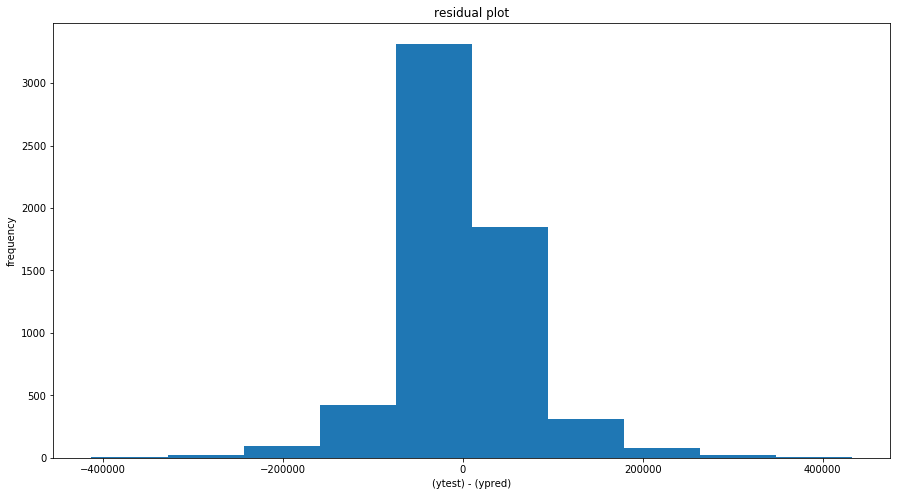

In [107]:
from sklearn.tree import DecisionTreeRegressor
decsion_tree = DecisionTreeRegressor()
model_score(decsion_tree,xtrain,ytrain,xtest,ytest)


R2 Score: 0.67
RMSE Score: -4449117695.14
root mean squared error for test data is 65427.84


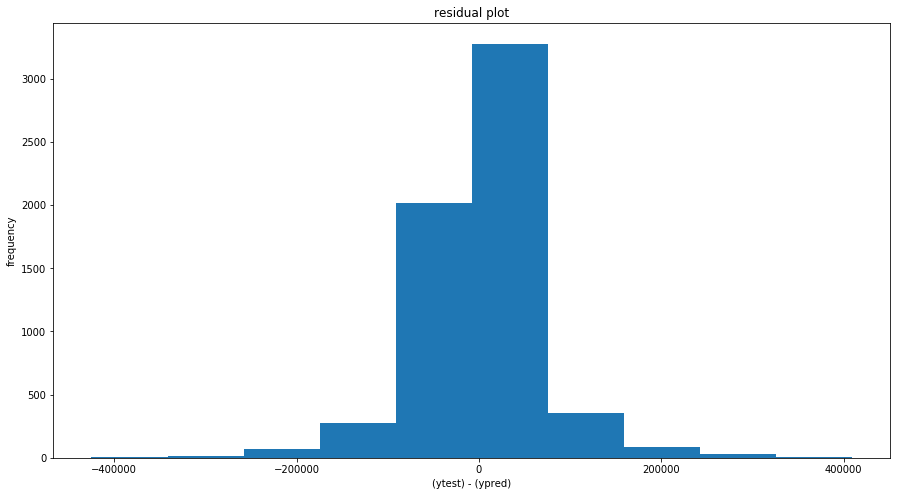

In [108]:
model_score(decsion_tree,xtrainbest,ytrain,xtestbest,ytest)

# Support Vector Regression

R2 Score: 0.30
RMSE Score: -9364352827.14
root mean squared error for test data is 95162.96


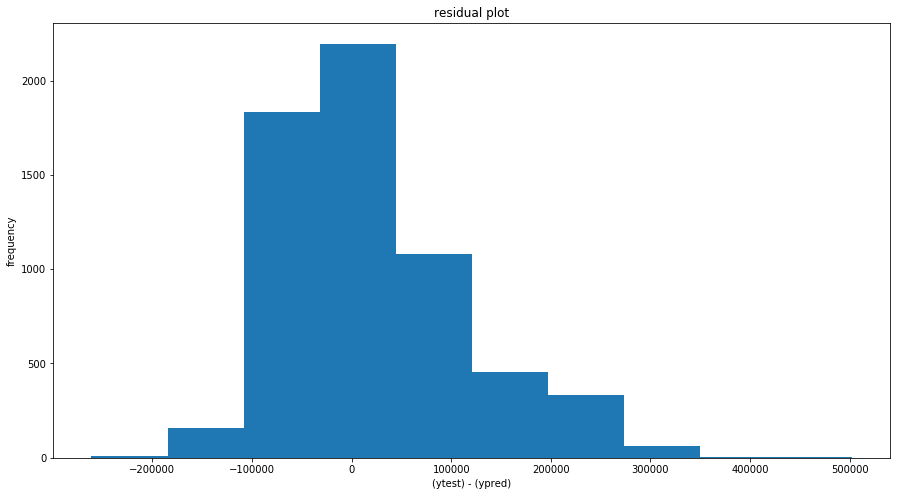

In [111]:
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
model_score(regressor,xtrain,ytrain,xtest,ytest)